In [1]:
import pandas as pd
from toolkit.utils import prepare_dps_freq, display_analysis

## Introduction

This experiment is the first phase of our endevour to optimize the frontend of the race.
This optimization effort is done in a situation in which maximizing will hurt us on others.
(_e.g._, increasing frequency in most cases will favor the split time on one hand,
and would hurt the DPS as well as the physical condition of the swimmer). 

## About the results

Our experiment is consisted of 4-5 time of pairs of $25m$ interval, in linearily increasing cycle frequency.
The $X$ axis is the frequency (mesearued in cycles/minute),
the $Y$ axis represents the Distance-per-stroke (DPS), whereas the $Z$ axis is the measured speed.

## Note
The _Time_ columns represents the time of the surfaced swimming only, whereas the _Speed_ column is $25m$ divided by the total lap time - surfaced and submerged swimming. 

The experiment was done in a standard SCM pool.

## Omer (BK)

In [11]:
import numpy as np


df_raw = pd.read_excel("omer/raw-data.xlsx")  
df_data = prepare_dps_freq(df_raw)

# 

# Outliers removal

As this test suffered from outliers (coincidence?) after removing them, we get a clearer picture.

,Frequency,Num strokes,Speed,Time
3,41.534810,7,1.780063,10.112
0,42.988741,7,1.842375,9.770
2,43.274432,8,1.622791,11.092
1,44.224492,7,1.842687,9.497
4,46.887210,9,1.519493,11.517
7,47.132757,8,1.767478,10.184
5,47.553002,8,1.684169,10.094
8,47.619048,9,1.587302,11.340
6,50.933786,8,1.910017,9.424


,Frequency,Num strokes,Speed,Time
6,50.933786,8,1.910017,9.424
1,44.224492,7,1.842687,9.497
0,42.988741,7,1.842375,9.770
3,41.534810,7,1.780063,10.112
7,47.132757,8,1.767478,10.184
5,47.553002,8,1.684169,10.094
2,43.274432,8,1.622791,11.092


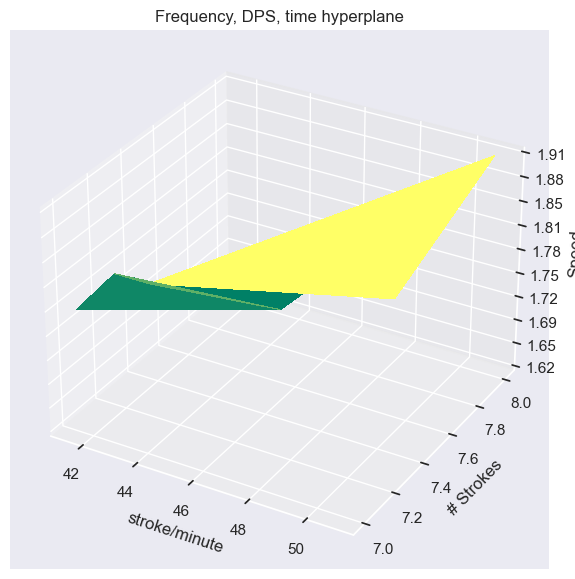

,Frequency,Num strokes
Frequency,1.000000,0.700013
Num strokes,0.700013,1.000000


,Num strokes,Time
Num strokes,1.000000,0.387102
Time,0.387102,1.000000


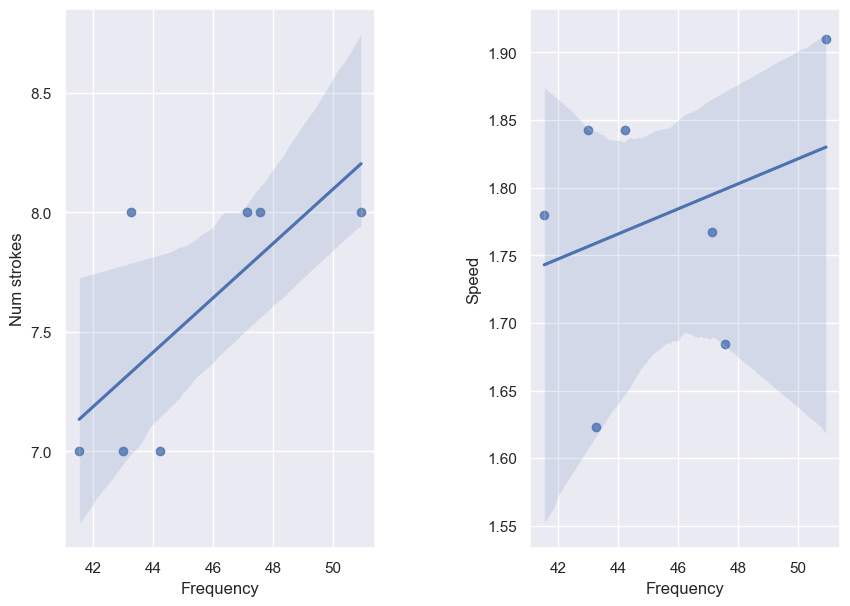

In [9]:
display(df_data.sort_values("Frequency"))
df_wo_outliers = df_data.sort_values("Frequency").drop(index=[4, 8])
display_analysis(df_wo_outliers)

In [12]:
display(df_raw)

,Type,Time,id,distance
0,breakout,1.967,1,7.0
1,cycle,1.375,1,NaN
2,cycle,1.232,1,NaN
3,cycle,1.461,1,NaN
4,cycle,1.417,1,NaN
...,...,...,...,...
85,cycle,1.133,10,NaN
86,cycle,1.235,10,NaN
87,cycle,1.190,10,NaN
88,cycle,1.184,10,NaN


/var/folders/nt/6j2x2cxx6n11n9_fw_x899l80000gn/T/ipykernel_33054/2429860901.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cycle["Frequency"] = 60 / df_cycle["Time"]


<Axes: xlabel='order', ylabel='value'>

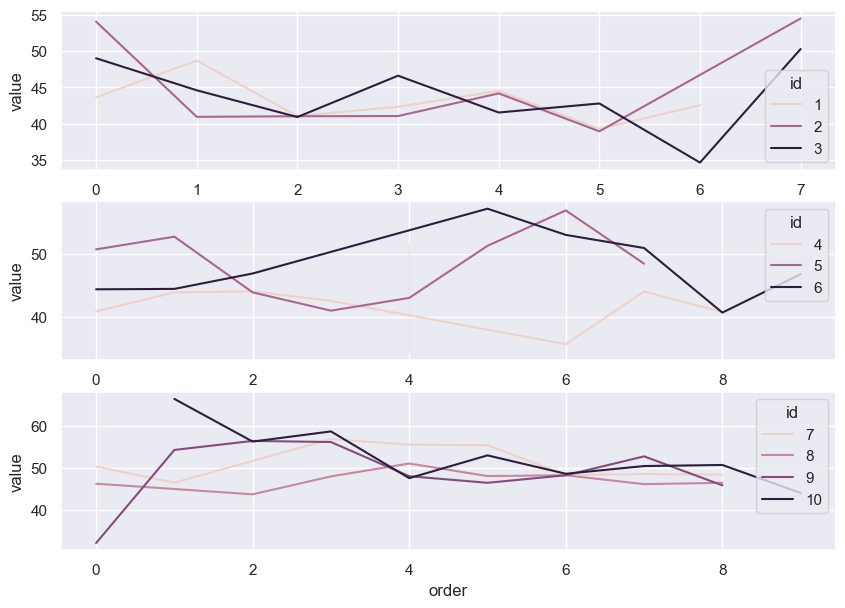

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=3)

df_cycle = df_raw.loc[df_raw["Type"] == "cycle"]
df_cycle["Frequency"] = 60 / df_cycle["Time"]
df_melted = pd.melt(frame=df_cycle, id_vars="id", value_vars="Frequency")
df_melted["order"] = df_raw.groupby("id", as_index=False).cumcount()

df_melted_lo, df_melted_mid, df_melted_hi = (
    df_melted[df_melted["id"] < 4],
    df_melted[(df_melted["id"] < 7) & (df_melted["id"] >= 4)],
    df_melted[df_melted["id"] >= 7])
# display(df_melted)
sns.lineplot(data=df_melted_lo, x="order", y="value", hue="id", ax=ax[0])
sns.lineplot(data=df_melted_mid, x="order", y="value", hue="id", ax=ax[1])
sns.lineplot(data=df_melted_hi, x="order", y="value", hue="id", ax=ax[2])
